In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
%matplotlib inline

# SVM

<p>SVM (Support Vector Machine), метод опорных векторов - один из представителей линейных алгоритмов, целью которого является постороение наиболее широкой разделяющей гиперплоскости для задачи классификации</p>
<p>Почему необходимо строить максимально широкую разделяющую поверхность, рассмотрим пример задачи классификации, какая из разделяющих линий является оптимальной?</p>
<img src="./img/classification.png">
<p>Логически кажется, что линия находящаяся посередине между классами является оптимальной, именно такая линия и порождается при максимизации ширины разделяющей полосы</p>
<img src="./img/classification_optimal.png">

## Линейно разделимая выборка

<p>Рассмотрим решение задачи в случае, линейно разделимой выборки, наша цель постороить разделяющую поверхность</p>
<p><center>$$\large{wx-b=0}$$</center></p>
<p>Вектор $\overrightarrow{w}$ перпендикулярен, данной плоскости а $\large{\frac{b}{||w||}}$ - расстояние от гиперплоскости до начала координат</p>
<p>Поскольку нас интересуют гиперплоскости на границах нашей разделяющей полосы, параллельные разделяющей поверхности, то можно доказать что они равны:</p>
<p><center>$$\large{wx-b=1}$$</center></p>
<p><center>$$\large{wx-b=-1}$$</center></p>
<p>Для положительного и отрицательного класса соотвественнно</p>
<p>Расстояние от начала координат то этих плоскостей будет равно $\large{\frac{b-1}{||w||}}$ и $\large{\frac{b+1}{||w||}}$, тогда ширина данной полосы равна $\large{\frac{2}{||w||}}$</p>
<p>Таким образом наша задача минимизировать ||w|| чтобы получить полосу оптимальной ширины</p>
<p>Это задача двойственной оптимизации</p>
<p><center>$$\large{\begin{cases} \begin{Vmatrix}w\end{Vmatrix}^2 \rightarrow min \\ y_i(wx_i - b) \ge 1 \end{cases}}$$</center></p>
<p>Решением задачи является:</p>
<p><center>$\large{w = \sum_{i=1}^{N}\lambda_iy_ix_i}$ (1)</center></p>
<p><center>$\large{b = wx_i - y_i}$ (2)</center></p>
<p><center>$\large{\lambda_i \ge 0}$ (3)</center></p>
<p><center>$\large{\lambda_i == 0}$ или $\large{y_i(x_iw-b) - 1 = 0}$ (4)</center></p>

------

<p>В силу условия 4 в сумму 1 с ненулевыми векторами $\large{\lambda_i}$ входят только вектора для которых $\large{y_i(x_iw-b) = 1}$, которые и являются опорными</p>

In [2]:
plt.style.use('seaborn')

In [3]:
np.random.seed(0)

In [4]:
data, target = make_classification(1000, 2, n_redundant=0, n_clusters_per_class=1, flip_y=0, class_sep=5)

In [5]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

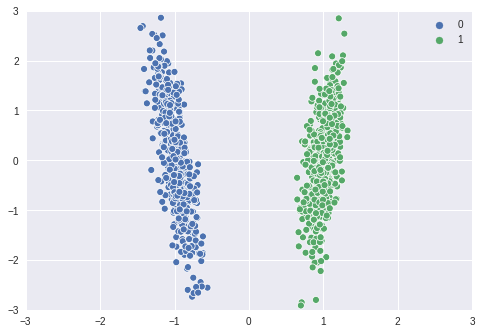

In [6]:
sns.scatterplot(data[:, 0], data[:, 1], target);
plt.xlim(-3, 3);
plt.ylim(-3, 3);

In [7]:
lr1 = Ridge(fit_intercept=True)
lr1.fit(data, target)
lr2 = LogisticRegression(fit_intercept=True)
lr2.fit(data, target)
lr3 = SVC(kernel='linear')
lr3.fit(data, target)

/home/imd/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

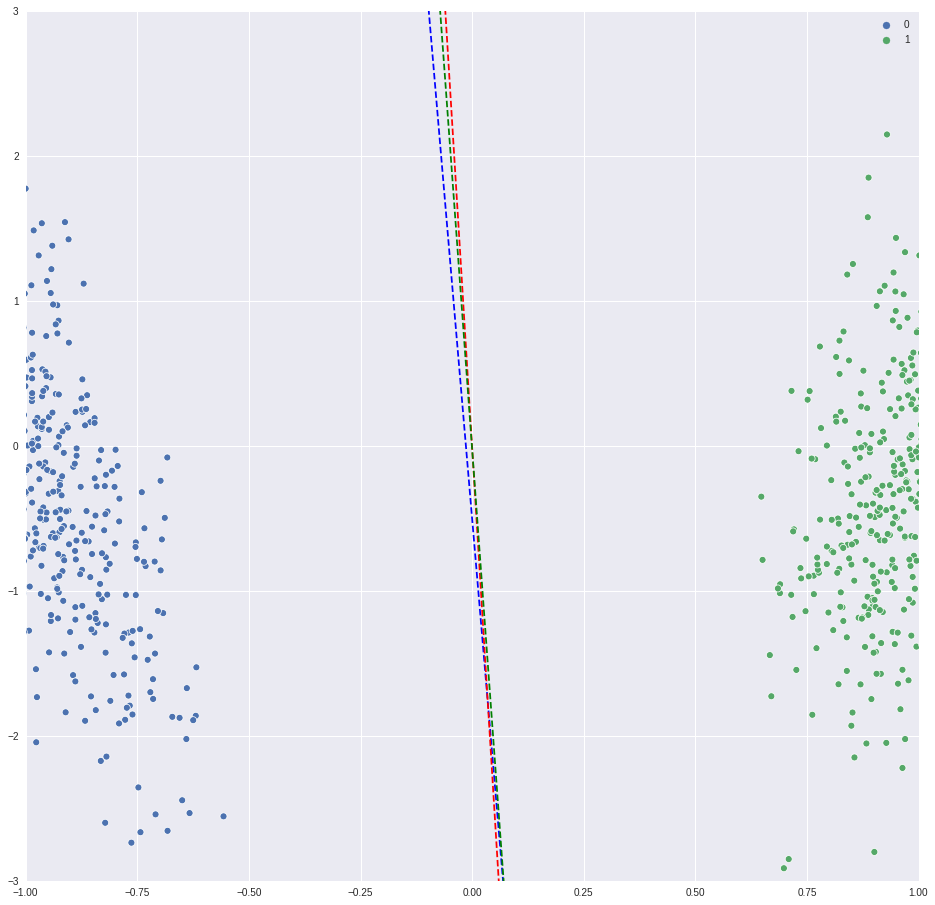

In [8]:
plt.figure(figsize=(16, 16));
sns.scatterplot(data[:, 0], data[:, 1], target);
plt.plot(np.arange(-1.5, 2), -np.arange(-1.5, 2)*lr1.coef_[0]/lr1.coef_[1] - lr1.intercept_, 
         color='blue', linestyle='--');
plt.plot(np.arange(-1.5, 2), -np.arange(-1.5, 2)*lr2.coef_[0, 0]/lr2.coef_[0, 1] - lr2.intercept_[0], 
         color='red', linestyle='--');
plt.plot(np.arange(-1.5, 2), -np.arange(-1.5, 2)*lr3.coef_[0, 0]/lr3.coef_[0, 1] - lr3.intercept_[0], 
         color='green', linestyle='--');
plt.xlim(-1, 1);
plt.ylim(-3, 3);

## Линейно неразделимая выборка

<p>При линейно неразделимой выборке появялются дополнительные условия для системы условий</p>
<p><center>$$\large{\begin{cases} \begin{Vmatrix}w\end{Vmatrix}^2 + C\sum_{i=1}^{N}\xi_i \rightarrow min_{\xi_i,w,b} \\ y_i(wx_i - b) \ge 1 - \xi_i \\ \xi_i \ge 0 \end{cases}}$$</center></p>

------

<p>Коэффициент C - коэффициент регуляризации модели, который позволяет выбирать между максимизацией ширины разделяющей полосы и минимизацией ошибки</p>
<p>Данная задача так же решается с помощью метода оптимизации Кунна-Таккера</p>

------

<p><center>$$\large{L(w,b,\xi,\lambda,\eta)} = \frac{1}{2}\begin{Vmatrix}w\end{Vmatrix}^2- \sum_{i=1}^{N}\lambda_i(y_i(wx_i-b)-1) - \sum_{i=1}^{N}\xi_i(\lambda_i+\eta_i-C)$$</center></p>

------

<p><center>$$\large{\begin{cases} -L(\lambda) = - \sum_{i=1}^{N} \lambda_i + \frac{1}{2}\sum_{i=1}^{N}\sum_{j=1}^{N}\lambda_i\lambda_jy_iy_j(x_ix_j) \rightarrow min_{\lambda} \\ 0 \le \lambda \le C, \eta_i \ge 0, \xi_i \ge 0 \\ \sum_{i=1}^{N}\lambda_iy_i = 0 \\ \lambda_i = 0 \spaceлибо\space y_i(wx_i-b) = 1 - \xi_i \\ \xi_i = 0 \spaceлибо\space \eta_i = 0\end{cases}} $$</center></p>

------

<p>В результате решения системы мы имеем 3 ситуации</p>

- $\lambda_i=0$, $\\eta_i=C$, $\xi_i=0$, $y_i(wx_i-b)\ge1$ - неинформативные объекты
<p></p>
- $0<\lambda_i<C$, $0<\eta_i<C$, $\xi_i=0$, $y_i(wx_i-b)=1$ - опорные объекты
<p></p>
- $\lambda_i=С$, $\\eta_i=0$, $\xi_i>0$, $y_i(wx_i-b)<1$ - выбросы объекты

<p>Решение классификатора имеет вид:</p>
<p><center>$$\large{a(x) = sign(\sum_{i=1}^{N}\lambda_iy_i(x_ix) - b)}$$</center></p>

## Kernel
<p>Важным свойством SVM является то, что для решения задачи классификации нам не нужно знать признаки сами по себе, поскольку и в минимизирующей функции стоит скалярное произведение векторов, и в классификаторе так же стоит скалярное произведение векторов</p>
<p>Данное свойство позволяет нам не думать о признаках как о таковых, а думать о сравнивномости векторов между собой, например в отличии от логичестической регресии которая для классификации текстов использует признак вхождения слова, или использует его взвешенные характеристики, такие как tfidf. SVM позволяет представлять текст таким образом чтобы мы могли сравнить его</p>
<p>Еще одним важным моментом является то что, скалярное произведение, может быть замененно скалярным произведением в другом пространстве, это позволяет нам преобразовывать линейно неразделимые выборки в линейно разделимые</p>
<p>Такое преобразование называется kernel функцией, и в данном случае классификатор принимает вид:</p>
<p><center>$$\large{a(x) = sign(\sum_{i=1}^{N}\lambda_iy_iK(x_ix) - b)}$$</center></p>
<p>Самые часто используемые kernel функции:</p>
 
- линейное $\large{K(x_i, x) = (x_i, x)}$
<p></p>
- полиномиальное (однородное) $\large{K(x_i, x) = (x_i, x)^d}$
<p></p>
- полиномиальное (неоднородное) $\large{K(x_i, x) = ((x_i, x)+1)^d}$
<p></p>
- радиальная базисная функция $\large{K(x_i, x) = \exp(-\gamma\begin{Vmatrix}x_i - x\end{Vmatrix}^2)}$, для $\gamma > 0$
<p></p>
- радиальная базисная функция Гаусса $\large{K(x_i, x) = \exp(-\frac{\begin{Vmatrix}x_i - x\end{Vmatrix}^2}{2\sigma^2})}$
<p></p>
- сигмоид $\large{K(x_i,x)=tanh(k(x_i, x) + c)}$, почти для всех k и с